In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('searches.csv',sep='^',usecols=['Date','Destination'],error_bad_lines=False) #read Date and Destination coloums from the file. some lines have erors which are ignored.
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d',errors='coerce') # parse Date with the given format
df.index=df['Date'] #index the parsed Date
df['month'] = df.index.month.astype(np.int64) # index months in Date 
df['year']= df.index.year.astype(np.int64) #index year in Date    
Barcelona_searches = df.groupby(['month','year'])['Destination'].apply(lambda x: x[x.str.contains('BCN')].count()) # group dataframe with indexed month and year'and search destionation air port: Barcelona with code BCN
Malaga_searches = df.groupby(['month','year'])['Destination'].apply(lambda x: x[x.str.contains('AGP')].count())# group dataframe with indexed month and year'and search destionation air port: Malaga with code AGP
Madrid_searches = df.groupby(['month','year'])['Destination'].apply(lambda x: x[x.str.contains('MAD')].count())# group dataframe with indexed month and year'and search destionation air port: Madrid with code MAD

<IPython.core.display.Javascript object>


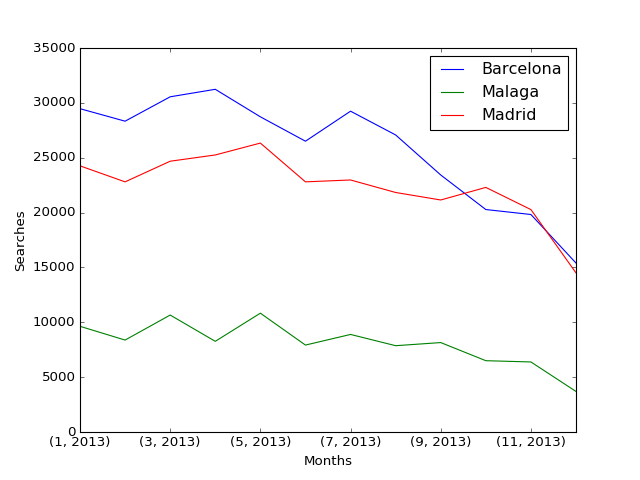

In [4]:
#plot graph
Barcelona_searches.plot(label='Barcelona')
Malaga_searches.plot(label='Malaga')
Madrid_searches.plot(label='Madrid')
plt.xlabel('Months')
plt.ylabel('Searches')
plt.legend()